# CNN Model with MNIST dataset

## Essential Imports

In [1]:
import keras

# import Sequential Model
from keras.models import Sequential

# import Flatten and Dense Layer 
# AND CNN AND MAX_POOL LAYER
from keras.layers import Flatten, Dense, MaxPool2D, Conv2D

Using TensorFlow backend.


## Working with MNIST Dataset

### Downloading and Loading

In [2]:
mnist = keras.datasets.mnist

# splits data into training and testing parts
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

### Normalize Data

In [3]:
# Pixel value of grayscale is from 0 to 255
# normalizing brings the value from 0 to 1 
# this reduces computation cost

xtrain = keras.utils.normalize(xtrain)
xtest = keras.utils.normalize(xtest)

### Reshaping data

In [4]:
# data format asked by keras conv2d layer
# batch, height, width, channels

#since the images are grayscale there is only 1 channel

xtrain_in = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest_in = xtest.reshape(xtest.shape[0], 28, 28, 1)

### One-Hot Encoding of labels

In [5]:
# import to_categorical utility 
# for one-hot encoding of labels

# OHE on train labels
ytrain = keras.utils.to_categorical(ytrain)

#OHE on test labels
ytest = keras.utils.to_categorical(ytest)

### Visualizing Data

In [6]:
# importing matplotlib library for plotting graphs

import matplotlib.pyplot as plt

### Plotting train data (16 samples)

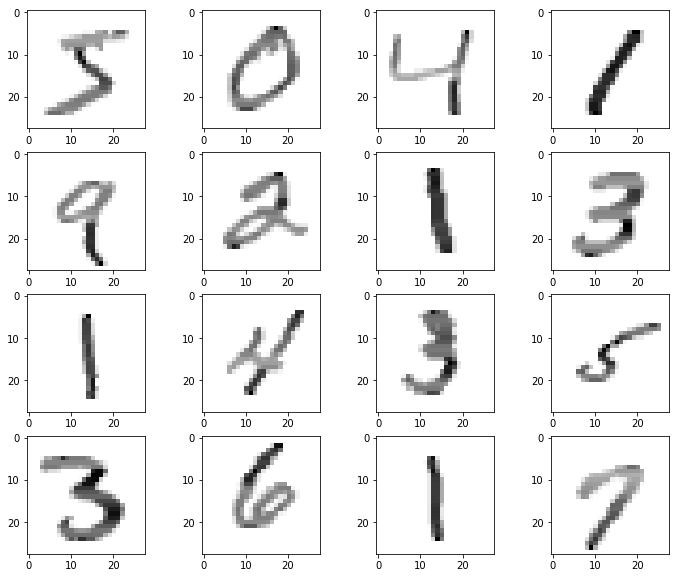

In [7]:
plt.figure(figsize=(12,10))

for i in range(16):
    # Adding subplot so that multiple plots can be displayed in data
    
    plt.subplot(4,4,i+1)
    
    # setting cmap or colormap displays image in black and white
    # as grayscale pixel values are from 0-255
    
    plt.imshow(xtrain[i], cmap='binary')

## Creating the model

In [8]:
# Declaring a sequential model
model = Sequential()

# Since the data contains 2D images
# of size 28x28 pixels each
# We must convert the image in a 1D array
model.add(Conv2D(10,(5,5), activation='relu', input_shape=(28,28,1)))
covout1 = MaxPool2D(pool_size=(2,2))
model.add(covout1)

model.add(Conv2D(5,(5,5), activation='relu'))
covout2 = MaxPool2D(pool_size=(2,2))
model.add(covout2)

model.add(Flatten())

# The output contains 10 different classes
# hence we use softmax activation 
# to find probabilities of sample belonging to EACH CLASS
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### The Final Model

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 5)           1255      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 5)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 2,325
Trainable params: 2,325
Non-trainable params: 0
_________________________________________________________________


### Fitting the data in the model

In [10]:
# xtrain = datapoints or features
# ytrain = one-hot encoded labels
# epochs = number of times the model needs to be trained 
# validation_split = How much data to be used for validating the training
# batch_size = how many data points to use at a time

model.fit(xtrain_in, ytrain, epochs=3, validation_split=0.3, batch_size=1000)

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 16s 386us/step - loss: 2.1863 - acc: 0.2621 - val_loss: 1.9270 - val_acc: 0.4679
Epoch 2/3
42000/42000 [==============================] - 16s 369us/step - loss: 1.3953 - acc: 0.6025 - val_loss: 0.9007 - val_acc: 0.7278
Epoch 3/3
42000/42000 [==============================] - 15s 367us/step - loss: 0.7213 - acc: 0.7814 - val_loss: 0.5561 - val_acc: 0.8349


### model status per epoch

In [11]:
model.history.history

{'val_loss': [1.9270277089542813, 0.9006684190697141, 0.5561448352204429],
 'val_acc': [0.46788888838556075, 0.7277777791023254, 0.834944443570243],
 'loss': [2.186304197424934, 1.3953257316634768, 0.7212758206185841],
 'acc': [0.26214285549663363, 0.6024523817357563, 0.7814047620410011]}

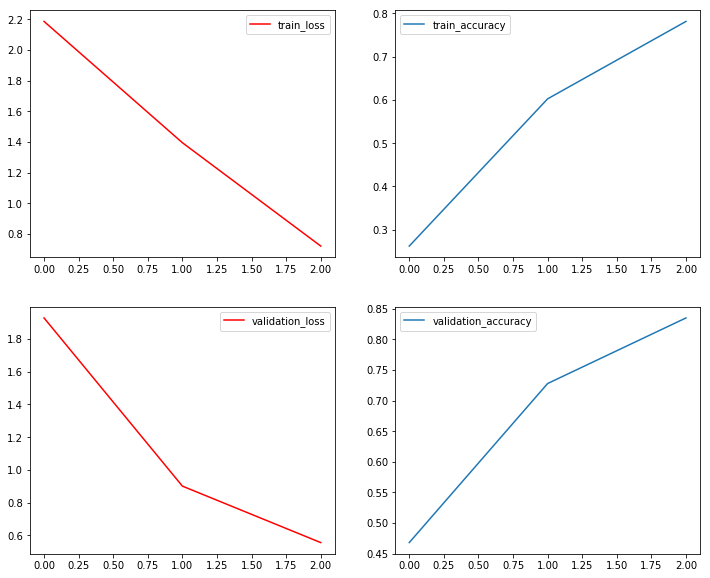

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(model.history.history['loss'], c='r', label='train_loss')
plt.legend()

plt.subplot(2,2,2)
plt.plot(model.history.history['acc'], label='train_accuracy')
plt.legend()

plt.subplot(2,2,3)
plt.plot(model.history.history['val_loss'], c='r', label='validation_loss')
plt.legend()

plt.subplot(2,2,4)
plt.plot(model.history.history['val_acc'], label='validation_accuracy')
plt.legend()

plt.show()

## Evaluating the model

### Predicting values

In [13]:
# The model.predict gives the probabilty 
# of the sample belonging to EACH CLASS

model.predict(xtest_in)

array([[3.03646470e-06, 2.41695898e-06, 1.70933636e-04, ...,
        9.97698724e-01, 3.44567925e-05, 1.14194219e-04],
       [7.86737576e-02, 2.27083429e-03, 4.87557650e-01, ...,
        7.68905193e-06, 2.81436980e-01, 1.01154577e-03],
       [1.07945179e-05, 9.95420277e-01, 5.29008161e-04, ...,
        1.53157033e-03, 3.64070496e-04, 1.44885547e-04],
       ...,
       [4.18779236e-04, 5.29022189e-03, 9.35715856e-04, ...,
        1.08302675e-01, 1.66777655e-01, 2.39842072e-01],
       [2.59786844e-03, 1.30651733e-02, 8.81965924e-03, ...,
        8.54462676e-04, 2.70816684e-01, 1.66406110e-02],
       [7.61413276e-02, 1.68114718e-06, 2.56564235e-03, ...,
        1.62437136e-05, 3.60707124e-03, 1.93185138e-03]], dtype=float32)

In [15]:
# To get the class which has the MAX PROBABILITY 
# that the sample belongs to it
# argmax is used
import numpy as np

np.argmax(model.predict(xtest_in), axis=1)

array([7, 2, 1, ..., 4, 4, 6])

### Predicting first 16 samples of test data

In [17]:
np.argmax(model.predict(xtest_in), axis=1)[:16]

array([7, 2, 1, 0, 4, 1, 4, 6, 4, 9, 0, 6, 9, 0, 1, 5])

### Plotting test data (16 samples)

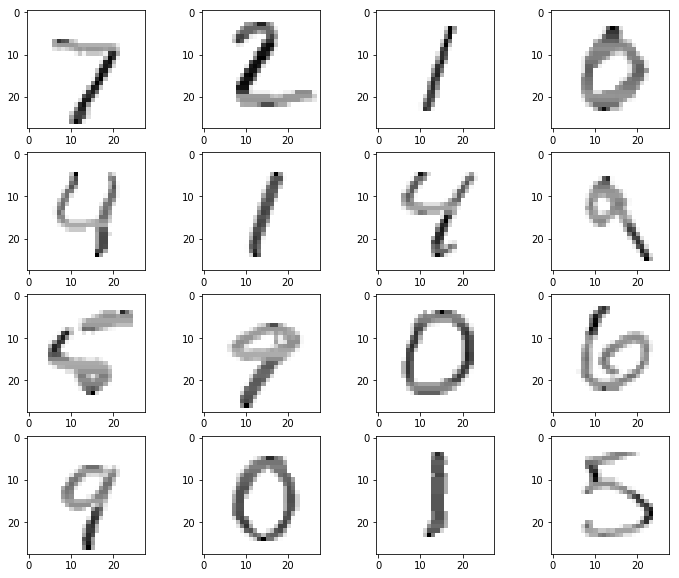

In [16]:
plt.figure(figsize=(12,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(xtest[i], cmap='binary')